In [1]:
import pandas as pd
data = pd.read_excel('AnomaData.xlsx')  # path to your dataset


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summaries
print(data.describe())

# Checking for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Visualizing correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Plot distributions of key features
data.hist(bins=30, figsize=(15, 10), layout=(5, 3))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()


In [ ]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE for handling data imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


In [2]:
print(data.isnull().sum())  # Missing values
print(data.duplicated().sum())  # Duplicates


time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64
0


In [3]:
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')


In [4]:
print(data.describe())


                                time             y            x1  \
count                          18398  18398.000000  18398.000000   
mean   1999-05-15 01:20:42.728557312      0.006740      0.011824   
min              1999-05-01 00:00:00      0.000000     -3.787279   
25%              1999-05-08 03:36:30      0.000000     -0.405681   
50%              1999-05-14 18:39:00      0.000000      0.128245   
75%              1999-05-22 06:01:30      0.000000      0.421222   
max              1999-05-29 00:06:00      1.000000      3.054156   
std                              NaN      0.081822      0.742875   

                 x2            x3            x4            x5            x6  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.157986      0.569300     -9.958345      0.006518      2.387533   
min      -17.316550    -18.198509   -322.781610     -1.623988   -279.408440   
25%       -2.158235     -3.537054   -111.378372     -0.446787    -24.34

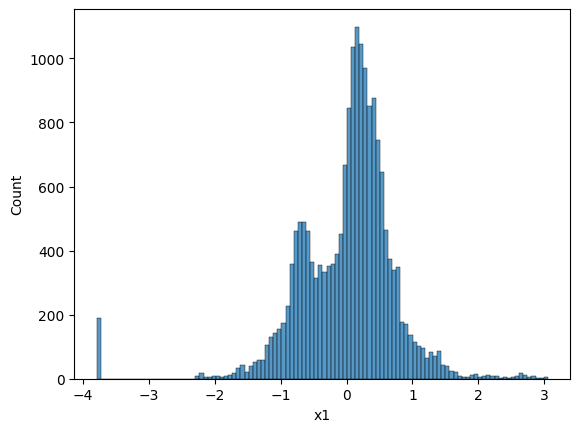

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['x1'])
plt.show()


In [6]:
pip install imbalanced-learn


In [7]:
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['y', 'time'])  # Features
y = data['y']  # Target

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [8]:
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day


<Axes: >

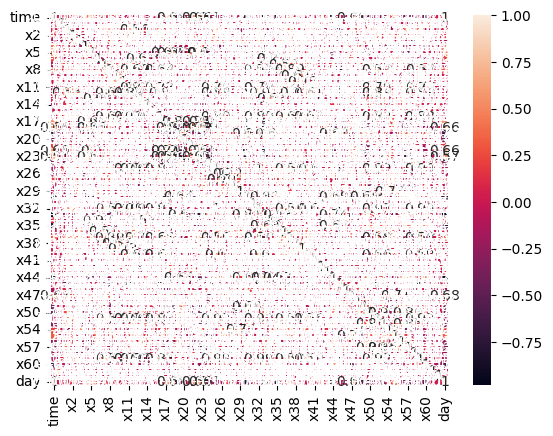

In [9]:
sns.heatmap(data.corr(), annot=True)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.999452804377565


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3638
           1       1.00      1.00      1.00      3672

    accuracy                           1.00      7310
   macro avg       1.00      1.00      1.00      7310
weighted avg       1.00      1.00      1.00      7310

[[3634    4]
 [   0 3672]]


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_estimators': [100, 200],
   'max_depth': [10, 20]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(grid_search.best_params_)


{'max_depth': 20, 'n_estimators': 200}


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at a leaf
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid (fewer combinations)
param_grid = {
    'n_estimators': [100, 150, 200],               # Number of trees
    'max_depth': [10, 20, 30, None],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]                     # Whether bootstrap samples are used when building trees
}

# Create the base model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup with n_iter=10 (testing only 10 random combinations)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Check the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}


In [18]:
# Train the model with the best parameters
best_model = random_search.best_estimator_

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.999452804377565
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3638
           1       1.00      1.00      1.00      3672

    accuracy                           1.00      7310
   macro avg       1.00      1.00      1.00      7310
weighted avg       1.00      1.00      1.00      7310

[[3634    4]
 [   0 3672]]


In [19]:
import pickle

# Save the best model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [21]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [22]:
import streamlit as st
import pandas as pd
import pickle

# Load the trained model from the pickle file
model = pickle.load(open('best_model.pkl', 'rb'))

# Title for the Streamlit app
st.title("Anomaly Detection Prediction")

# Instructions for the user
st.write("Input feature values to predict whether an anomaly is detected.")

# Create input fields for the necessary features
x1 = st.number_input('Feature 1: x1', value=0.0)
x2 = st.number_input('Feature 2: x2', value=0.0)
x3 = st.number_input('Feature 3: x3', value=0.0)
# Add more input fields as necessary for other features

# When the user presses the 'Predict' button, we make the prediction
if st.button('Predict'):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame([[x1, x2, x3]], columns=['x1', 'x2', 'x3'])  # Adjust the column names to match your feature names

    # Make the prediction using the loaded model
    prediction = model.predict(input_data)

    # Display the result to the user
    if prediction[0] == 1:
        st.success('Anomaly detected!')
    else:
        st.success('No anomaly detected.')


2024-09-30 06:40:53.484 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 06:40:53.610 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-30 06:40:53.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 06:40:53.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 06:40:53.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 06:40:53.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 06:40:53.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 06:40:53.629 Thread 'MainThread': mi

In [25]:
# Saving the Streamlit script to a file
streamlit_script = """
import streamlit as st
import pandas as pd
import pickle

# Load the trained model from the pickle file
model = pickle.load(open('best_model.pkl', 'rb'))

# Title for the Streamlit app
st.title("Anomaly Detection Prediction")

# Instructions for the user
st.write("Input feature values to predict whether an anomaly is detected.")

# Create input fields for the necessary features (replace 'x1', 'x2', etc., with your actual feature names)
x1 = st.number_input('Feature 1: x1', value=0.0)
x2 = st.number_input('Feature 2: x2', value=0.0)
x3 = st.number_input('Feature 3: x3', value=0.0)
# Add more input fields for additional features

# When the user presses the 'Predict' button, make the prediction
if st.button('Predict'):
    # Create a DataFrame with the input data (replace with actual feature names)
    input_data = pd.DataFrame([[x1, x2, x3]], columns=['x1', 'x2', 'x3'])  # Adjust this to match your feature names

    # Make the prediction using the loaded model
    prediction = model.predict(input_data)

    # Display the result to the user
    if prediction[0] == 1:
        st.success('Anomaly detected!')
    else:
        st.success('No anomaly detected.')
"""

# Save the script to a file
with open("app.py", "w") as file:
    file.write(streamlit_script)


In [26]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pickle

# Assuming 'best_model' is the trained model object
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [28]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>